In [1]:
import sqlite3

import pandas as pd
import lux

In [2]:
conn = sqlite3.connect('../data/data.sqlite3')
df = pd.read_sql_query('''SELECT play, danmaku, like, coin, collect, category, duration
                       FROM videos
                       WHERE (collect < 40000) AND (coin < 50000) AND (play < 1200000) AND (like < 80000)
                       LIMIT 5000''', conn)
df.intent = []
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
vis = df.exported[0]

In [8]:
print(vis.to_code('matplotlib'))

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
from matplotlib.cm import ScalarMappable
df = pd.DataFrame({'play': {984: 957393, 986: 846157, 990: 883944, 992: 890179, 993: 809493, 994: 559339, 997: 359576, 998: 628528, 999: 645436, 1000: 303718, 1001: 307028, 1002: 513407, 1003: 406750, 1004: 221550, 1005: 239997, 1006: 200389, 1007: 156134, 1008: 223686, 1009: 186777, 1010: 256973, 1011: 160451, 1012: 189565, 1013: 143770, 1014: 135924, 1015: 148985, 1016: 112816, 1017: 167181, 1018: 142788, 1019: 156573, 1020: 105991, 1021: 162801, 1022: 155613, 1023: 106185, 1024: 111554, 1025: 1

c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:Glyph 38899 missing from current font.
c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:Glyph 20048 missing from current font.
c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:Glyph 29616 missing from current font.
c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:Glyph 22330 missing from current font.
c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:Glyph 38899 missing from current font.
c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:Glyph 20048 missing from current font.
c:\users\alex\projects\videoinfo\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runt

In [5]:
# intent for duration
df1 = df[df['duration'] < 600]
df1.intent = ['duration', 'coin']
df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
# intent for category, 2p (bar & scatter)
df2 = pd.read_sql_query('''SELECT play, danmaku, like, coin, collect, category, duration
                       FROM videos
                       WHERE (category = "MV") OR (category = "VOCALOID·UTAU") OR (category = "原创音乐") OR (category = "翻唱")
                       LIMIT 5000''', conn)
df2.intent = ['category', 'coin']
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

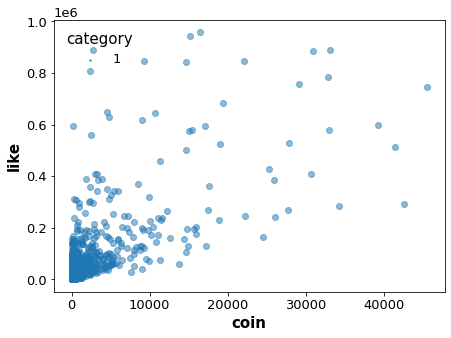

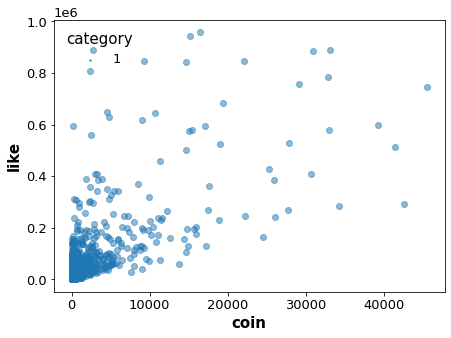

In [5]:
# vis = df2.exported[0]
# print(vis.to_code('matplotlib'))
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
fig, ax = plt.subplots(figsize=(7, 5))
x_pts = df['coin']
y_pts = df['play']
scatter = ax.scatter(x_pts, y_pts)
ax.legend(labels=['1', '2', '3', '4'], title='category', markerscale=.2, loc='upper left', ncol=1, frameon=False, fontsize='13')
ax.set_xlabel('coin', fontsize='15')
ax.set_ylabel('like', fontsize='15')
scatter.set_alpha(0.5)
fig

In [ ]:
# intent for strongest correlation
